In [1]:
##1. Understanding the Problem Statement & Import Packages and Datasets :

In [2]:
# Warning Libraries :
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Scientific and Data Manipulation Libraries :
import pandas as pd
import numpy as np
import math
import os

In [4]:
# ML Libraries :
from sklearn.preprocessing            import LabelEncoder, OneHotEncoder 
from sklearn.preprocessing            import StandardScaler, MinMaxScaler, Normalizer, RobustScaler, MaxAbsScaler
from sklearn.model_selection          import KFold, StratifiedKFold, train_test_split, cross_val_score

from sklearn.tree                     import DecisionTreeClassifier
from sklearn.ensemble                 import VotingClassifier, RandomForestClassifier
from sklearn.metrics                  import f1_score, confusion_matrix, classification_report


In [5]:
# Boosting Algorithms :
from xgboost                          import XGBClassifier
from catboost                         import CatBoostClassifier
from lightgbm                         import LGBMClassifier

In [6]:
# Data Visualization Libraries :
%matplotlib inline
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

In [7]:
# Set Location path :
import os

os.chdir('/media/mr-robot/New Volume1/New folder (2)/hr analytics')

In [8]:
train = pd.read_csv('train_hr_analytics.csv')
test = pd.read_csv('test_hr_analytics.csv')

# Look at the head() of the data

train.head(10)

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   
5        58896          Analytics   region_2        Bachelor's      m   
6        20379         Operations  region_20        Bachelor's      f   
7        16290         Operations  region_34  Master's & above      m   
8        73202          Analytics  region_20        Bachelor's      m   
9        28911  Sales & Marketing   region_1  Master's & above      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   
5            sourcing                2   31                   3.0   
6               other                1   31                   3.0   
7            sourcing                1   33                   3.0   
8               other                1   28                   4.0   
9            sourcing                1   32                   5.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   
5                  7              0            0                  85   
6                  5              0            0                  59   
7                  6              0            0                  63   
8                  5              0            0                  83   
9                  5              1            0                  54   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0  
5            0  
6            0  
7            0  
8            0  
9            0

In [9]:
test2 = pd.read_csv('test_hr_analytics.csv')

In [10]:
##2. Perform EDA (Exploratory Data Analysis) - Understanding the Datasets :

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [12]:
# help(px.colors.sequential)
#reference-: https://plotly.com/python/parallel-categories-diagram/
fig = px.parallel_categories(train[['department','education','gender','previous_year_rating','KPIs_met >80%',
                                   'is_promoted']], 
                             color="is_promoted", 
                             color_continuous_scale=px.colors.sequential.Aggrnyl  )
fig.show()

In [13]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

<AxesSubplot:>

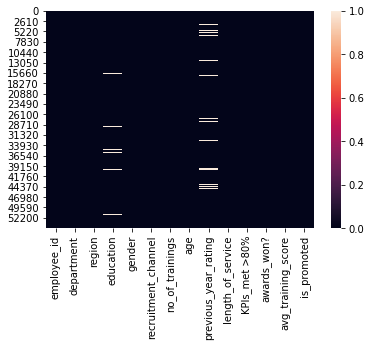

In [14]:
sns.heatmap(train.isnull())

<AxesSubplot:xlabel='education', ylabel='count'>

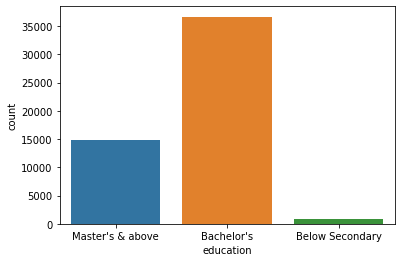

In [15]:
sns.countplot(x="education",data=train)

In [16]:
#3. Fill/Impute Missing Values : Categorical - Forward/BackFill/Others :


In [17]:
# Filling Missing Values in Train and Test :

display(train.isnull().sum())

train["previous_year_rating"] = train["previous_year_rating"].fillna(0)
test["previous_year_rating"] = test["previous_year_rating"].fillna(0)

train = train.ffill(axis = 0)
train = train.bfill(axis = 0)

display(test.isnull().sum())

test = test.ffill(axis = 0)
test = test.bfill(axis = 0)

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [18]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [19]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [20]:
#5. Feature Engineering :

In [21]:
# Binning :
train['age'] = pd.cut( x=train['age'], bins=[20, 29, 39, 49], labels=['20', '30', '40'] )
test['age']  = pd.cut(x=test['age'], bins=[20, 29, 39, 49], labels=['20', '30', '40'] )

In [22]:
train.age.head()

0    30
1    30
2    30
3    30
4    40
Name: age, dtype: category
Categories (3, object): ['20' < '30' < '40']

In [23]:
x=train.drop("is_promoted",axis=1)
y=train["is_promoted"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [24]:
#Data Scaling : MinMaxScaler, StandardScaler, RobustScaler :

def data_encoding( encoding_strategy , encoding_data , encoding_columns ):
    if encoding_strategy == "LabelEncoding":
        print("IF LabelEncoding")
        Encoder = LabelEncoder()
        for column in encoding_columns :
            print("column",column )
            encoding_data[ column ] = Encoder.fit_transform(tuple(encoding_data[ column ]))

    elif encoding_strategy == "OneHotEncoding":
        print("ELIF OneHotEncoding")
        encoding_data = pd.get_dummies(encoding_data)

    dtypes_list =['float64','float32','int64','int32']
    encoding_data.astype( dtypes_list[0] ).dtypes
    
    return encoding_data

In [25]:
encoding_columns = [ "region", "age","department", "education", "gender", "recruitment_channel" ]
encoding_strategy = [ "LabelEncoding", "OneHotEncoding"]

X_train_encode = data_encoding( encoding_strategy[0] , X_train , encoding_columns )
X_test_encode = data_encoding( encoding_strategy[0] , X_test , encoding_columns )

display(test.isnull().sum())

IF LabelEncoding
column region
column age
column department
column education
column gender
column recruitment_channel
IF LabelEncoding
column region
column age
column department
column education
column gender
column recruitment_channel


employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                     1504
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38365 entries, 51189 to 33003
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           38365 non-null  int64  
 1   department            38365 non-null  int64  
 2   region                38365 non-null  int64  
 3   education             38365 non-null  int64  
 4   gender                38365 non-null  int64  
 5   recruitment_channel   38365 non-null  int64  
 6   no_of_trainings       38365 non-null  int64  
 7   age                   38365 non-null  int64  
 8   previous_year_rating  38365 non-null  float64
 9   length_of_service     38365 non-null  int64  
 10  KPIs_met >80%         38365 non-null  int64  
 11  awards_won?           38365 non-null  int64  
 12  avg_training_score    38365 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 4.1 MB


In [27]:
display(X_train_encode.head())
display(X_test_encode.head())

employee_id  department  region  education  gender  \
51189        36289           2      31          0       0   
35949        28978           7      11          2       0   
36385        38523           7      25          0       1   
43913        39202           8      11          2       0   
9289         17245           4      31          0       1   

       recruitment_channel  no_of_trainings  age  previous_year_rating  \
51189                    0                1    0                   0.0   
35949                    2                1    2                   5.0   
36385                    2                1    1                   3.0   
43913                    0                1    2                   5.0   
9289                     2                1    1                   3.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
51189                  1              1            0                  52  
35949                 11              1            0                  47  
36385                  3              0            0                  50  
43913                 15              1            0                  75  
9289                   7              0            0                  61

employee_id  department  region  education  gender  \
931          35433           5      11          0       0   
28310        75012           7       3          0       1   
7767         74954           7      11          0       1   
17330         9248           7      14          0       1   
15222        11498           5      14          2       0   

       recruitment_channel  no_of_trainings  age  previous_year_rating  \
931                      0                1    2                   4.0   
28310                    0                3    0                   0.0   
7767                     2                1    1                   5.0   
17330                    0                1    0                   2.0   
15222                    0                2    1                   4.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
931                   16              1            0                  74  
28310                  1              1            0                  47  
7767                   7              1            0                  53  
17330                  3              0            0                  47  
15222                  8              0            0                  73

In [28]:
X_train_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38365 entries, 51189 to 33003
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           38365 non-null  int64  
 1   department            38365 non-null  int64  
 2   region                38365 non-null  int64  
 3   education             38365 non-null  int64  
 4   gender                38365 non-null  int64  
 5   recruitment_channel   38365 non-null  int64  
 6   no_of_trainings       38365 non-null  int64  
 7   age                   38365 non-null  int64  
 8   previous_year_rating  38365 non-null  float64
 9   length_of_service     38365 non-null  int64  
 10  KPIs_met >80%         38365 non-null  int64  
 11  awards_won?           38365 non-null  int64  
 12  avg_training_score    38365 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 4.1 MB


In [29]:
def data_scaling( scaling_strategy , scaling_data , scaling_columns ):

    if scaling_strategy =="RobustScaler" :
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])

    elif scaling_strategy =="MinMaxScaler" :
        scaling_data[scaling_columns] = MinMaxScaler().fit_transform(scaling_data[scaling_columns])

    else : # If any other scaling send by mistake still perform Robust Scalar
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])

    return scaling_data

In [30]:
scaling_strategy = ["RobustScaler","MinMaxScaler"]
X_train_scale = data_scaling( scaling_strategy[0] , X_train_encode , X_train_encode.columns )
X_test_scale = data_scaling( scaling_strategy [0] , X_test_encode , X_test_encode.columns )

In [31]:
#Create Baseline ML Model for Binary Classification Problem :

In [32]:
estimator=[]

In [33]:
xgb= XGBClassifier(learning_rate =0.1, 
n_estimators=494, 
max_depth=5,
subsample = 0.70, 
verbosity = 0,
scale_pos_weight = 2.5,
updater ="grow_histmaker",
base_score=0.2)

In [34]:
catb=CatBoostClassifier(learning_rate=0.15, 
n_estimators=494, 
subsample=0.085,
max_depth=5, 
num_leaves=31,
scale_pos_weight=2.5)

In [35]:
lgbm=LGBMClassifier(subsample_freq = 2, 
objective ="binary",
importance_type = "gain",
verbosity = -1, 
max_bin = 60,
num_leaves=300,
boosting_type = 'dart',
learning_rate=0.15,
n_estimators=494,
max_depth=5, 
scale_pos_weight=2.5)

In [36]:
estimator.append(('xgbClassifier',xgb))
estimator.append(('CatBoostClassifier',catb))
estimator.append(('LGBMClassifier',lgbm))

In [37]:
vot_hard = VotingClassifier(estimators = estimator, voting ='soft')

In [38]:
vot_hard.fit(X_train_scale,y_train)

0:	learn: 0.5671141	total: 57.4ms	remaining: 28.3s
1:	learn: 0.4940303	total: 63.3ms	remaining: 15.6s
2:	learn: 0.4550352	total: 68.7ms	remaining: 11.2s
3:	learn: 0.4252958	total: 73.5ms	remaining: 9s
4:	learn: 0.4064943	total: 77.8ms	remaining: 7.6s
5:	learn: 0.3915191	total: 82ms	remaining: 6.67s
6:	learn: 0.3832925	total: 87.1ms	remaining: 6.06s
7:	learn: 0.3724879	total: 90.9ms	remaining: 5.52s
8:	learn: 0.3634006	total: 95.9ms	remaining: 5.17s
9:	learn: 0.3443170	total: 101ms	remaining: 4.88s
10:	learn: 0.3394676	total: 107ms	remaining: 4.68s
11:	learn: 0.3326112	total: 112ms	remaining: 4.52s
12:	learn: 0.3303897	total: 117ms	remaining: 4.33s
13:	learn: 0.3296307	total: 121ms	remaining: 4.15s
14:	learn: 0.3207082	total: 127ms	remaining: 4.05s
15:	learn: 0.3147369	total: 131ms	remaining: 3.9s
16:	learn: 0.3136676	total: 134ms	remaining: 3.77s
17:	learn: 0.3127449	total: 139ms	remaining: 3.68s
18:	learn: 0.3122455	total: 144ms	remaining: 3.59s
19:	learn: 0.3119587	total: 150ms	remai

VotingClassifier(estimators=[('xgbClassifier',
                              XGBClassifier(base_score=0.2, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.1,
                                            max_delta_step=None, max_depth=5,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimato...
                                            validate_parameters=None,
                                            verbosity=0)),
                             ('

In [39]:
y_pred = vot_hard.predict(X_test_scale)

In [40]:
score = f1_score(y_test, y_pred)

In [41]:
score

0.536158452326117

In [42]:
test_encode = data_encoding( encoding_strategy[0] , test , encoding_columns )

IF LabelEncoding
column region
column age
column department
column education
column gender
column recruitment_channel


In [43]:
test_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  int64  
 2   region                23490 non-null  int64  
 3   education             23490 non-null  int64  
 4   gender                23490 non-null  int64  
 5   recruitment_channel   23490 non-null  int64  
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 2.3 MB


In [44]:
test_scale = data_scaling( scaling_strategy[0] , test , test.columns )

In [45]:
prediction2= vot_hard.predict(test_scale)

In [46]:
dic={'employee_id':test2.employee_id,'is_promoted':prediction2}

In [47]:
promotion=pd.DataFrame(dic)
promotion.to_csv('/home/mr-robot/vscodepy/submission1.csv',index=False)